In [2]:
%run Jansen_And_Rit.py
%run OptimiseFunctions.py
import os
import numpy as np
import mne
from scipy.stats import zscore
import pandas as pd
eeg_raw_data_dir = (
    "C:/Users/stapl/Documents/CDocuments/FinalYearProject/Model/eeg_raw_data"
)

In [3]:
import random
subjects = []
for filename in os.listdir(eeg_raw_data_dir):
    subject_id = int(filename.split("_", 5)[4])
    subjects.append(subject_id)

# Shuffle the list
random.shuffle(subjects)

pairs = []
while len(pairs) < 35:
    for i in range(0, len(subjects) - 1, 2):
        if subjects[i] != subjects[i + 1]:  # Ensure no item is paired with itself
            pairs.append((subjects[i], subjects[i + 1]))

In [258]:
from scipy.stats import pearsonr
losses = []

for (p1, p2) in pairs:

    for filename in os.listdir(eeg_raw_data_dir):

        subject_id = int(filename.split("_", 5)[4])
        if subject_id == p1:

            eeg_path = os.path.join(eeg_raw_data_dir, filename)
            raw1 = mne.io.read_raw_fif(eeg_path, preload=True)
            

    for filename in os.listdir(eeg_raw_data_dir):

        subject_id = int(filename.split("_", 5)[4])
        if subject_id == p2:

            eeg_path = os.path.join(eeg_raw_data_dir, filename)
            raw2 = mne.io.read_raw_fif(eeg_path, preload=True)
            
    ch_names1 = raw1.ch_names
    ch_names2 = raw2.ch_names
    set1 = set(ch_names1)
    set2 = set(ch_names2)
    unique_items = list(set1.symmetric_difference(set2))
    print(len(unique_items))

    raw1 = raw1.drop_channels(unique_items, on_missing='ignore')
    raw2 = raw2.drop_channels(unique_items, on_missing='ignore')

    psd1 = raw1.compute_psd(fmin=0, fmax=80, picks="all")
    psd2 = raw2.compute_psd(fmin=0, fmax=80, picks="all")

    correlation_coefficients = []

    psd1 = psd1.get_data()
    psd2 = psd2.get_data()

    print(psd1.shape, psd2.shape)

    for ch in range(psd1.shape[0]):
        gen_channel = psd1[ch]
        emp_channel = psd2[ch]
        correlation_coefficient, _ = pearsonr(gen_channel, emp_channel)
        correlation_coefficients.append(correlation_coefficient)

    # Calculate the average correlation coefficient across all channels
    correlation_coefficients = np.array(correlation_coefficients)
    average_correlation = np.mean(correlation_coefficients)

    loss = -average_correlation
    losses.append(loss)

Opening raw data file C:/Users/stapl/Documents/CDocuments/FinalYearProject/Model/eeg_raw_data\mara_sasica_chanrej_filt_7634_01142011_RestEyesClosed_AC_4_preprocessed-raw.fif...
    Range : 0 ... 177301 =      0.000 ...   177.301 secs
Ready.
Reading 0 ... 177301  =      0.000 ...   177.301 secs...
Opening raw data file C:/Users/stapl/Documents/CDocuments/FinalYearProject/Model/eeg_raw_data\filt_chanrej_SASICA_MARA_6568_20080101_RestEyesClosed_Unknown_4_preprocessed-raw.fif...
    Range : 0 ... 277769 =      0.000 ...   277.769 secs
Ready.
Reading 0 ... 277769  =      0.000 ...   277.769 secs...
9
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)
(59, 164) (59, 164)
Opening raw data file C:/Users/stapl/Documents/CDocuments/FinalYearProject/Model/eeg_raw_data\filt_chanrej_SASICA_MARA_9267_041211_RestEyesClosed_DC_2_preprocessed-raw.fif...
    Range : 0 ... 316486 =      0.000 ...   316.486 secs
Ready.
Reading 0 ... 316486  =      0.000 ...   316.486 secs...
Opening raw d

In [30]:
baseline_eeg = np.load('results/baseline_losses_eeg.npy', allow_pickle=True)
baseline_bold = np.load('results/baseline_losses_bold.npy', allow_pickle=True)

eeg_schiz_eeg_loss = np.load('results/top_eeg_schiz_eeg_loss.npy', allow_pickle=True)
eeg_control_eeg_loss = np.load('results/top_eeg_control_eeg_loss.npy', allow_pickle=True)

bold_schiz_eeg_loss = np.load('results/schiz_bold_eeg_loss.npy', allow_pickle=True)
bold_control_eeg_loss = np.load('results/control_bold_eeg_loss.npy', allow_pickle=True)

bold_schiz_bold_loss = np.load('results/schiz_bold_bolds_loss.npy', allow_pickle=True)
bold_control_bold_loss = np.load('results/control_bold_bold_losses.npy', allow_pickle=True)

eeg_schiz_bold_loss = np.load('results/eeg_schiz_bold_loss.npy', allow_pickle=True)
eeg_control_bold_loss = np.load('results/eeg_control_bold_loss.npy', allow_pickle=True)

Mean Loss: -0.6642816482321601
Standard Deviation of Loss: 0.07828914352439179


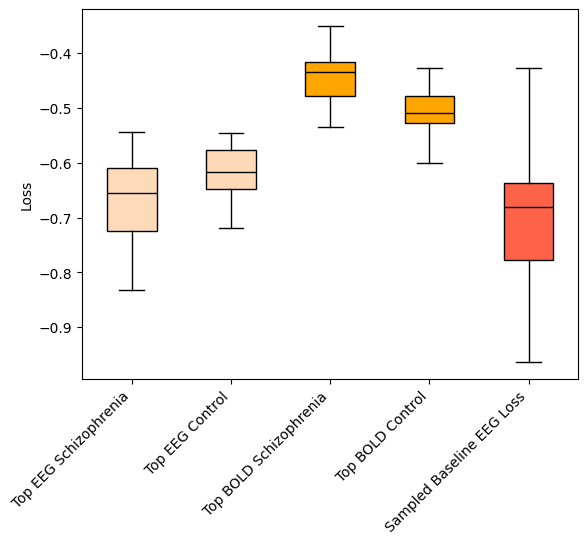

In [60]:
import matplotlib.pyplot as plt
import numpy as np
# For eeg losses

# Calculate mean and standard deviation
mean_loss = np.mean(eeg_schiz_eeg_loss)
std_loss = np.std(eeg_schiz_eeg_loss)

# Print mean and standard deviation (optional)
print(f"Mean Loss: {mean_loss}")
print(f"Standard Deviation of Loss: {std_loss}")

import matplotlib.pyplot as plt
import numpy as np

loss_dists = [eeg_schiz_eeg_loss, eeg_control_eeg_loss,  bold_schiz_eeg_loss,  bold_control_eeg_loss, baseline_eeg]
labels = ['Top EEG Schizophrenia', 'Top EEG Control', 'Top BOLD Schizophrenia', 'Top BOLD Control', 'Sampled Baseline EEG Loss']
colors = ['peachpuff', 'peachpuff', 'orange', 'orange', 'tomato']

fig, ax = plt.subplots()
ax.set_ylabel('Loss')

medianprops = dict(color='black', linewidth=1)
bplot = ax.boxplot(loss_dists,
                   patch_artist=True, medianprops=medianprops, labels=labels) 
# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45, ha='right')
plt.show()

Mean Loss: -0.6642816482321601
Standard Deviation of Loss: 0.07828914352439179


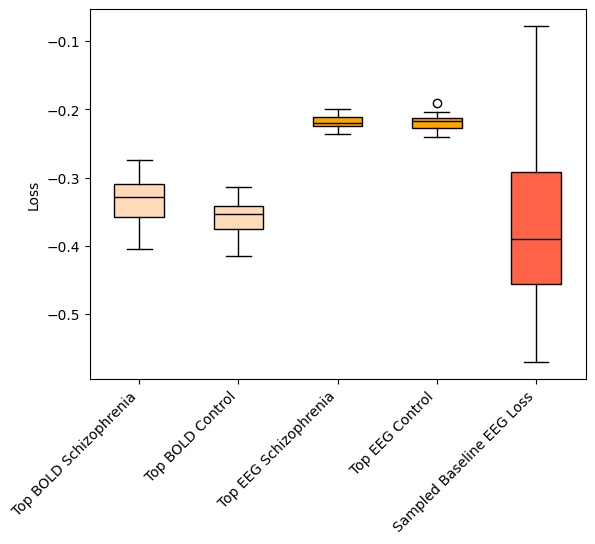

In [61]:
import matplotlib.pyplot as plt
import numpy as np
# For eeg losses

# Calculate mean and standard deviation
mean_loss = np.mean(eeg_schiz_eeg_loss)
std_loss = np.std(eeg_schiz_eeg_loss)

# Print mean and standard deviation (optional)
print(f"Mean Loss: {mean_loss}")
print(f"Standard Deviation of Loss: {std_loss}")

import matplotlib.pyplot as plt
import numpy as np

loss_dists = [bold_schiz_bold_loss, bold_control_bold_loss,  eeg_schiz_bold_loss,  eeg_control_bold_loss, baseline_bold]
labels = ['Top BOLD Schizophrenia', 'Top BOLD Control', 'Top EEG Schizophrenia', 'Top EEG Control', 'Sampled Baseline EEG Loss']
colors = ['peachpuff', 'peachpuff', 'orange', 'orange', 'tomato']

fig, ax = plt.subplots()
ax.set_ylabel('Loss')

medianprops = dict(color='black', linewidth=1)
bplot = ax.boxplot(loss_dists,
                   patch_artist=True, medianprops=medianprops, labels=labels) 
# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45, ha='right')
plt.show()